# Metadata

```yaml
Course:    DS 5001
Module:    11 Lab
Topic:     Running the Syuzhet Package in R with sentence lists
Author:    R.C. Alvarado
Date:      12 April 2023 (revised)
```

**Notes**

- Uses Jockers' [Syuzhet module](https://rdrr.io/cran/syuzhet/) in R.
- To use R in Jupyter, see [How to Create an R Kernel on Jupyter Lab](how-to-install-r-kernel.pdf).

# Set Up

## Configuration

In [1]:
env_file = "../../../env.ini"

library(ini)

cfg <- read.ini(env_file) 

# We do the following because R's ini package doesn't understand Python's interpolation
data_home <- sub('%\\(base_path\\)s', cfg$DEFAULT$base_path, cfg$DEFAULT$data_home) 

In [2]:
method <- 'syuzhet' # methods = "syuzhet", "afinn", "bing", "nrc", "stanford"
fft_low_pass = 3
dct_low_pass = 6

## Libraries

In [3]:
library(syuzhet)
library(tidyverse)
library(magrittr) # Why is this not in tidyverse?

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [4]:
options(repr.plot.width=15, repr.plot.height=6)

# Get Data

In [5]:
CORPUS <- read.csv(paste(data_home, "/syuzhet/combo-SENTENCES.csv", sep = ''))

See if you can get the sentences for a given text.

In [6]:
pg105 <- CORPUS %>% 
    filter(book_id == '105') %>% 
    select(sent_str)

# Define Main Function

In [7]:
plotitall <- function (this_book_id, book_title) {

    sentences <- CORPUS %>% 
        filter(book_id == this_book_id) %>% 
        select(sent_str)
    
    # Get the book and compute sentiment
    book.sentiment_vector <- get_sentiment(sentences$sent_str, method=method)
    
    # Plot the raw signal
    plot(book.sentiment_vector, 
         type = "l", 
         main = book_title,
         xlab = "Narrative Time", 
         ylab = "Emotional Valence")
    
    # Get smoothed signal the old way
    book.ft_values <- get_transformed_values(book.sentiment_vector, 
                                     low_pass_size = fft_low_pass, 
                                     x_reverse_len = 100,
                                     scale_vals = TRUE, 
                                     scale_range = FALSE)
    
    # Get smoothing signal the new way
    book.dct_values <- get_dct_transform(book.sentiment_vector, 
                                         scale_vals = TRUE, 
                                         scale_range = FALSE)
    
    # Plot the old 
    plot(book.ft_values,
         type = "h", 
         main = paste(book_title, " transformed (FFT)"), 
         xlab = "narrative time", 
         ylab = "Emotional Valence", col = "red")
    
    # Plot the new
    plot(book.dct_values,
         type = "h", 
         main = paste(book_title, " transformed (DCT)"), 
         xlab = "narrative time", 
         ylab = "Emotional Valence", col = "red")
    
}

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


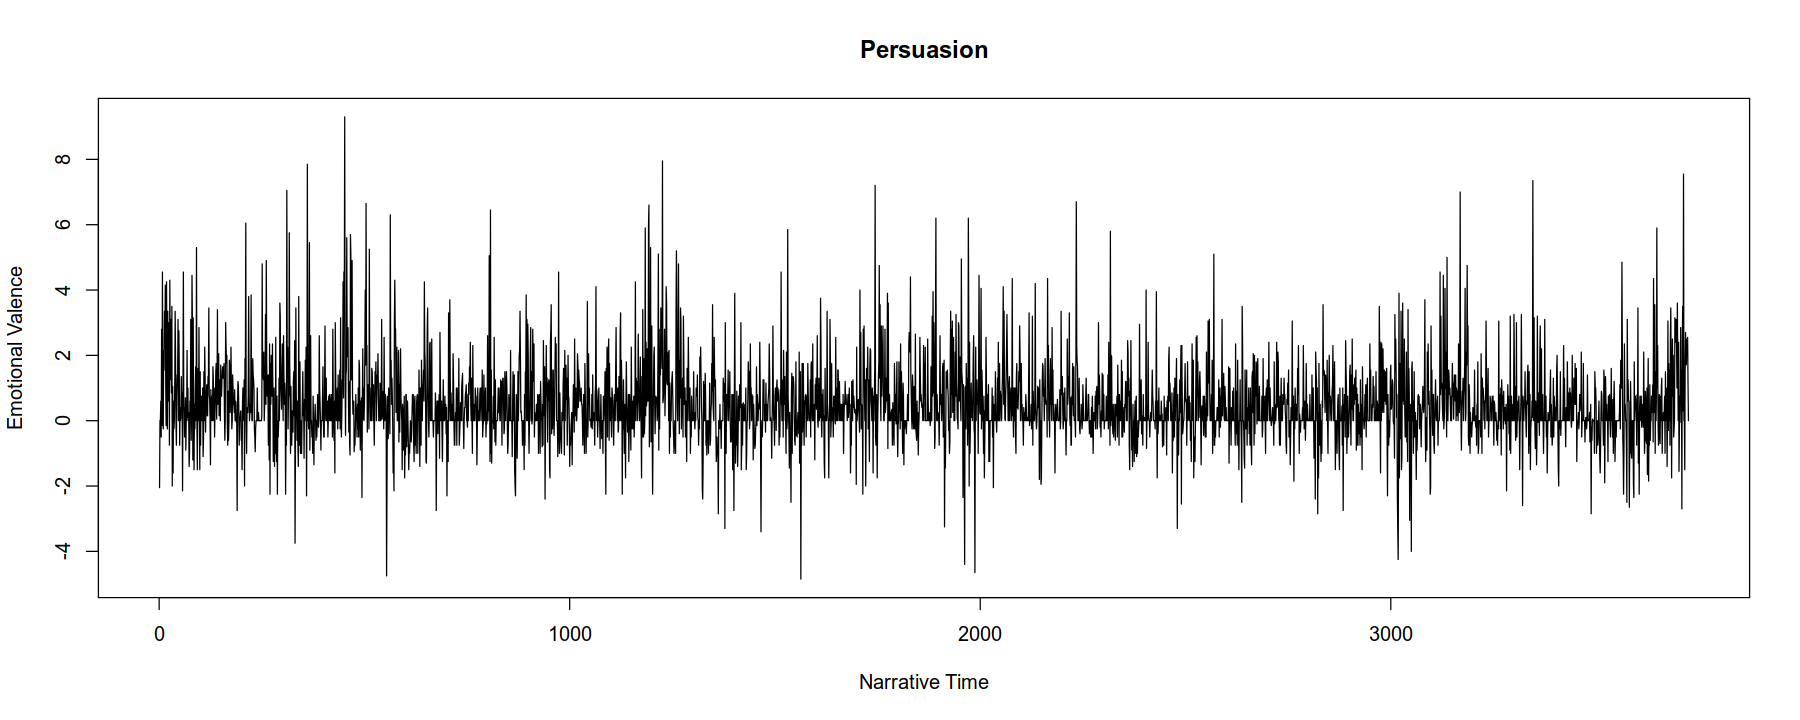

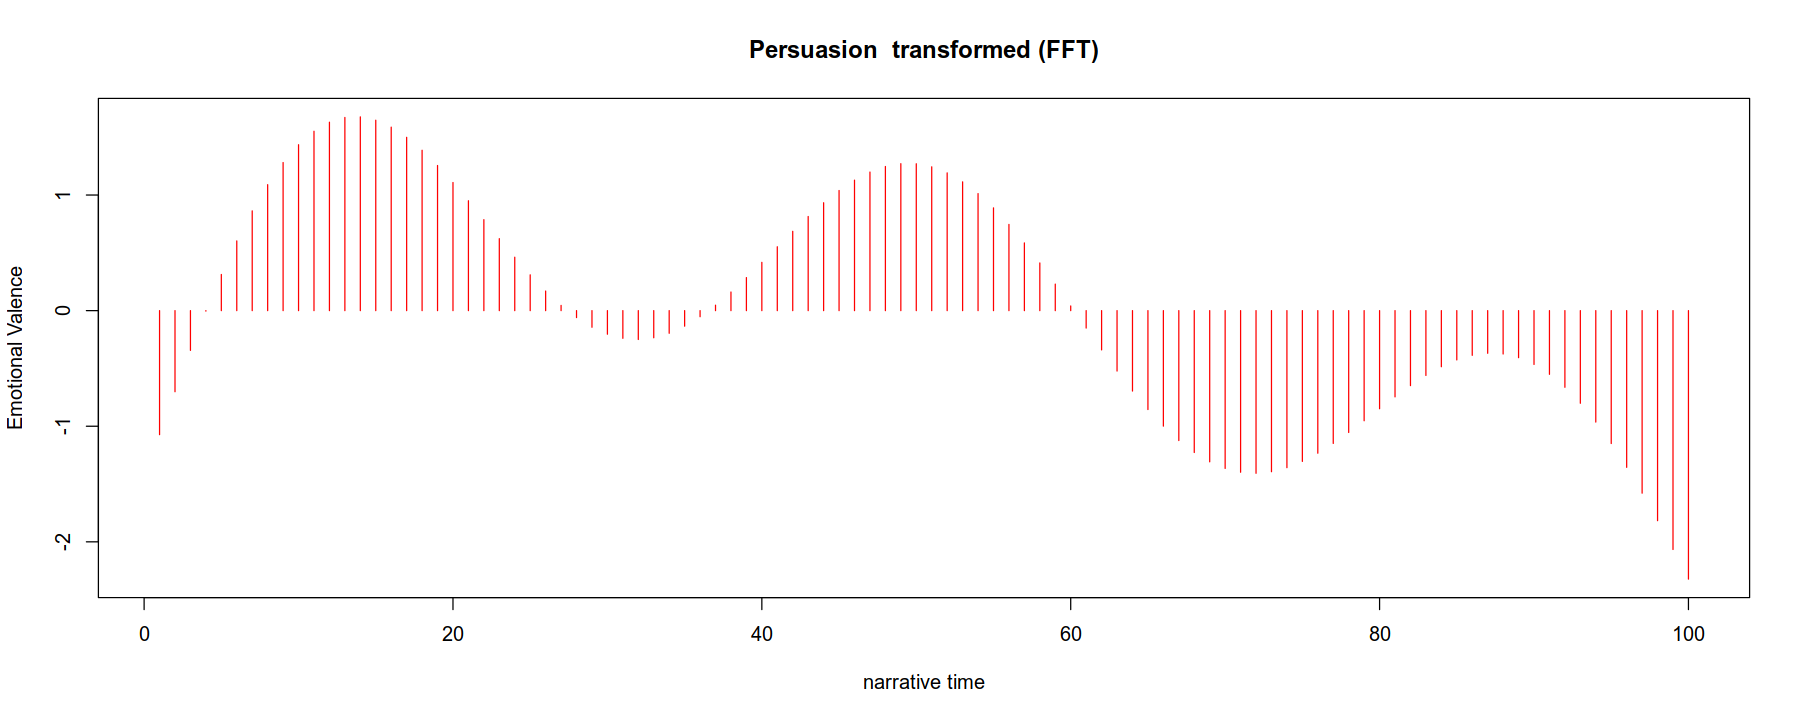

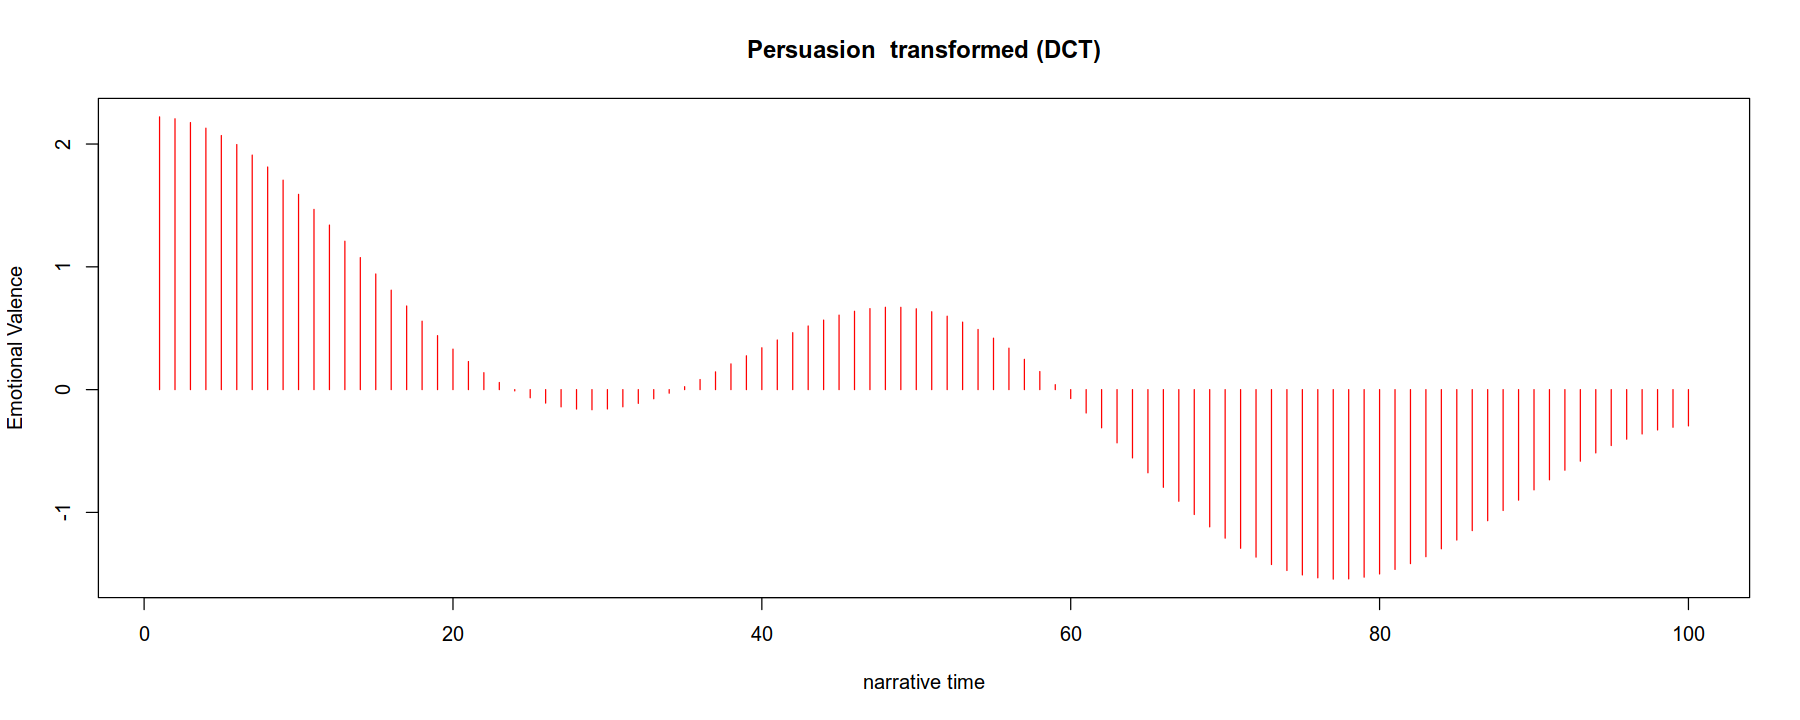

In [8]:
plotitall('105', 'Persuasion')

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


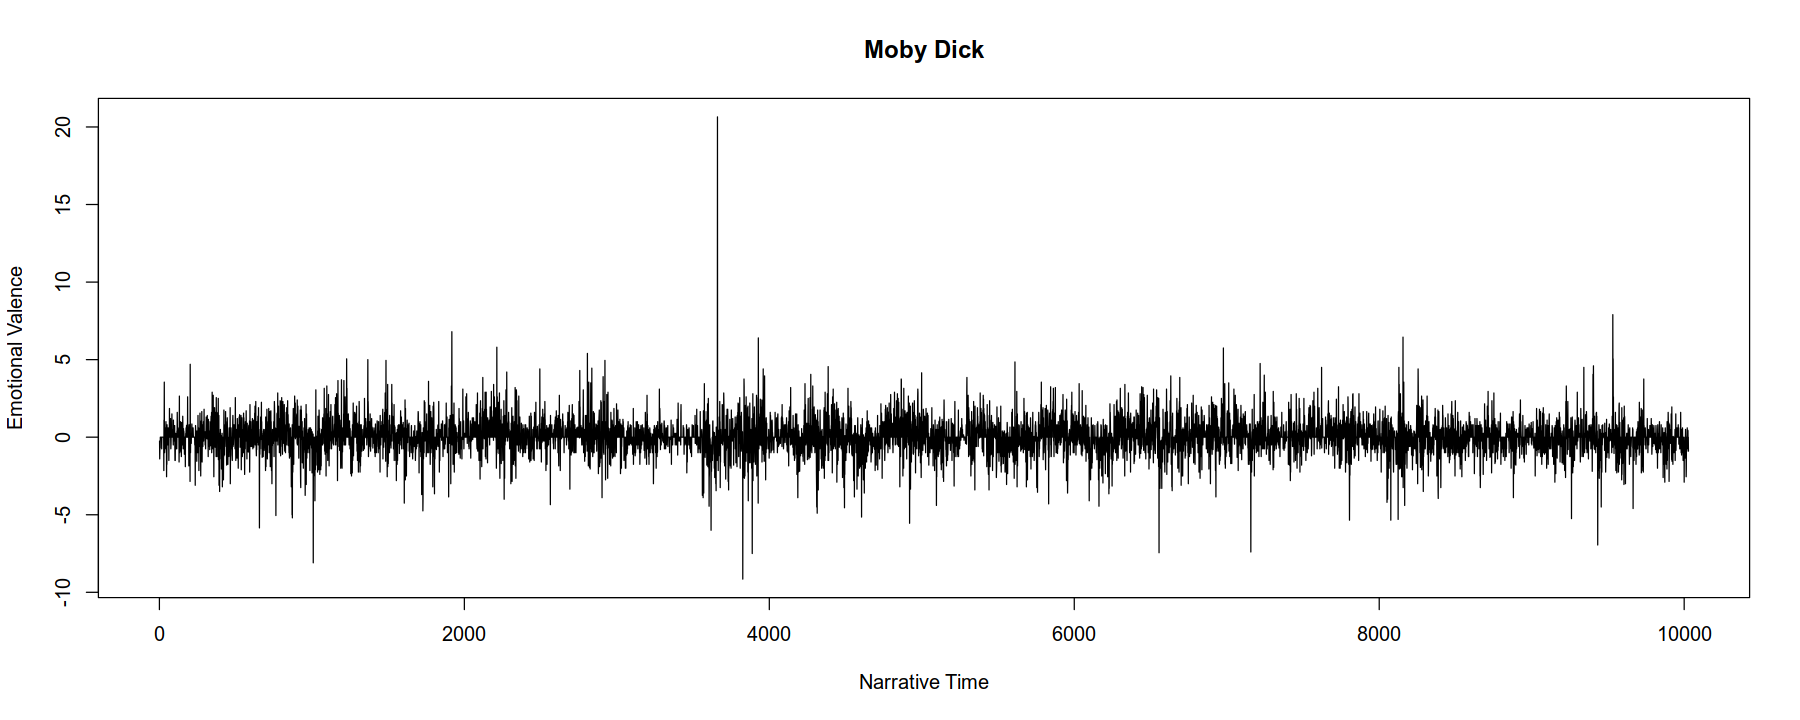

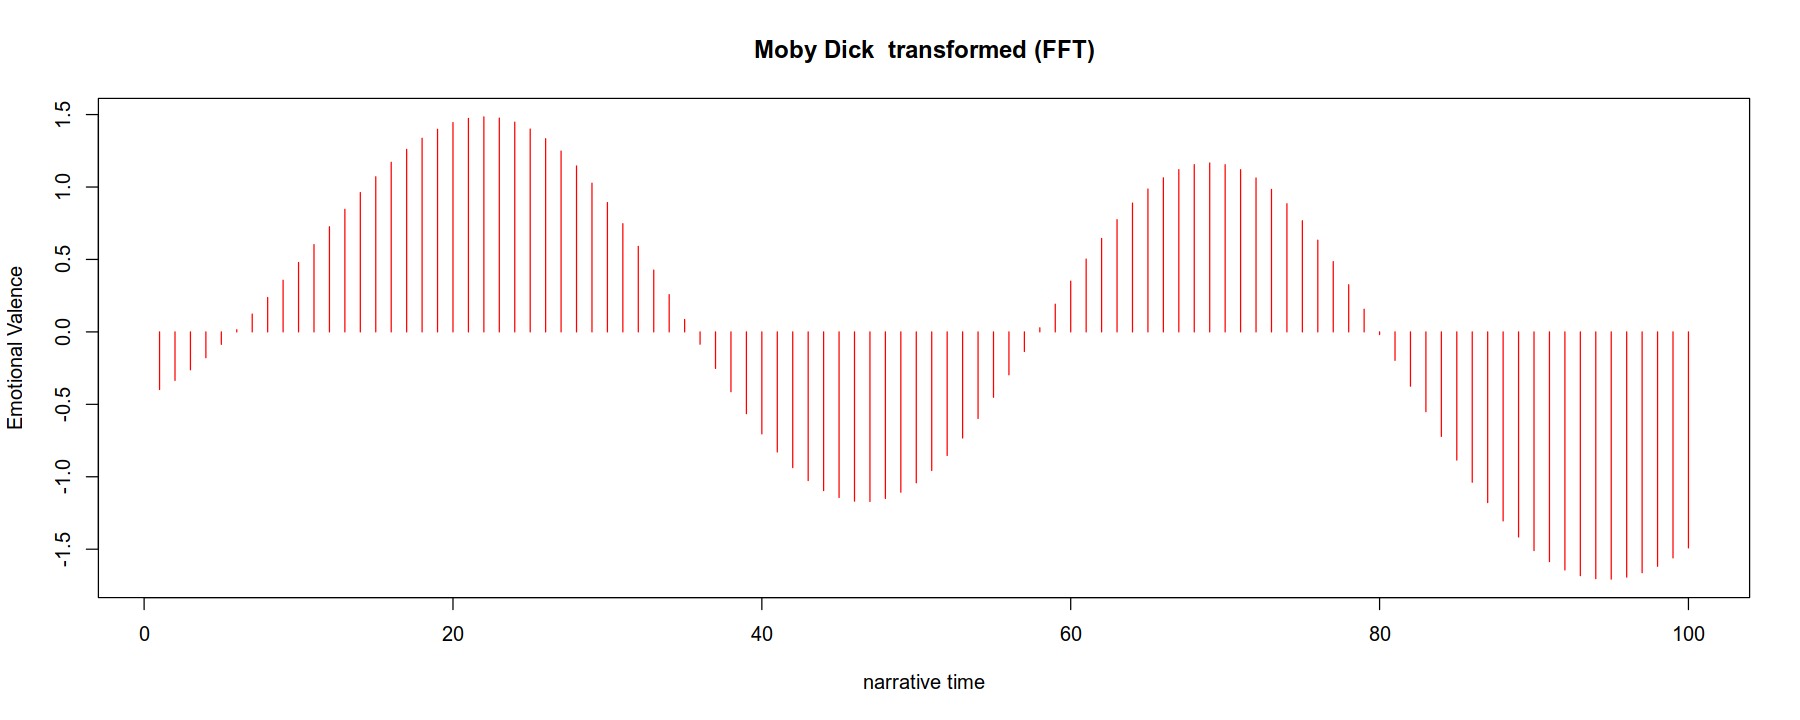

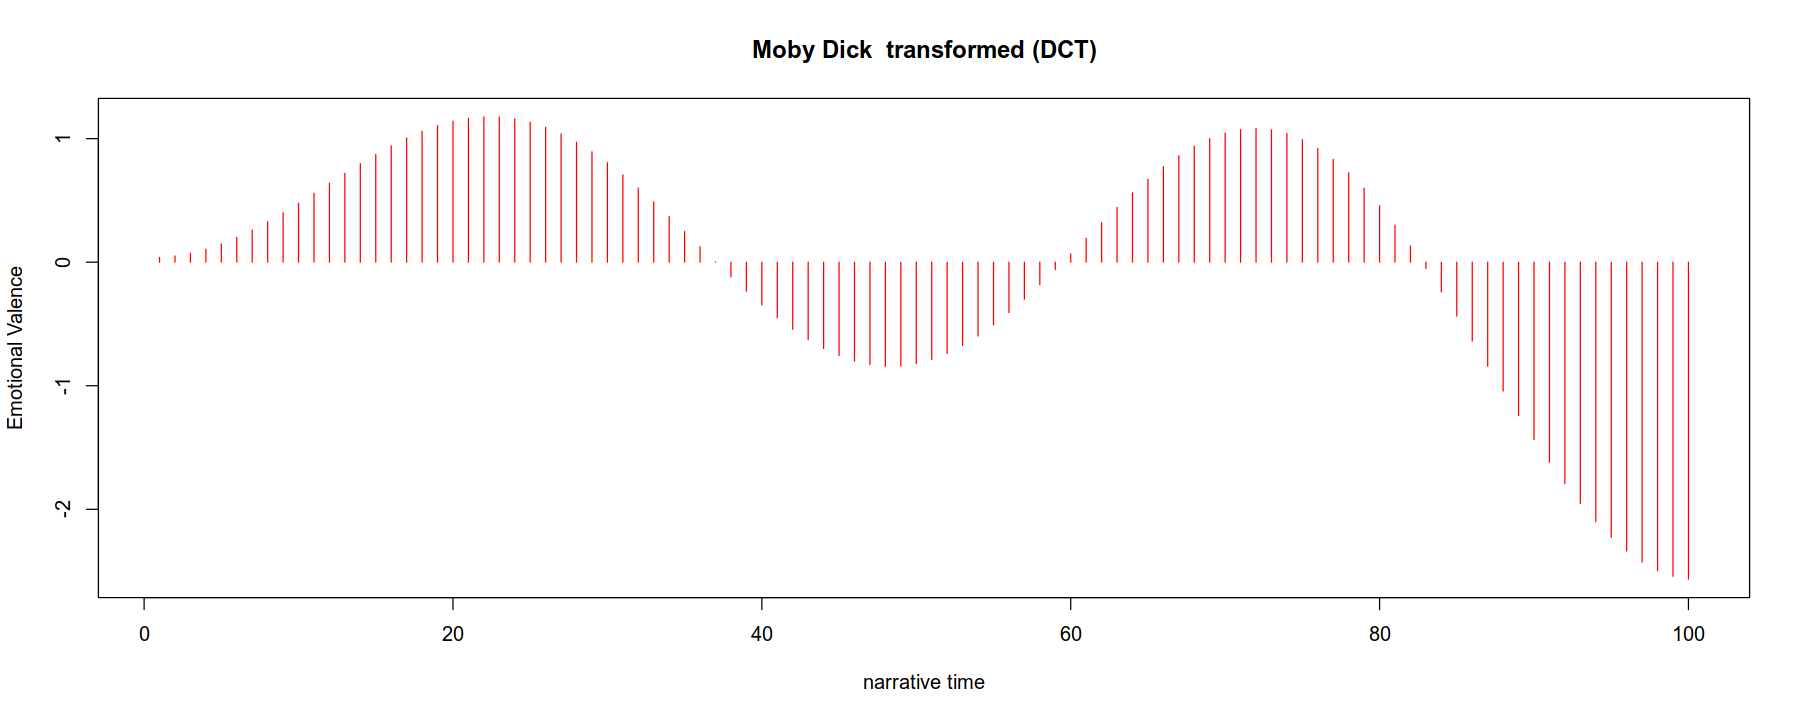

In [9]:
plotitall('2701', 'Moby Dick')